In [1]:
#imports
import numpy as np
from dnn_utils import *
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

C:\Users\shubhamkumar.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
% matplotlib inline
np.random.seed(1)

In [3]:
train_dataset= load_images('train')
test_dataset = load_images('test')
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset(train_dataset, test_dataset)

y= 0


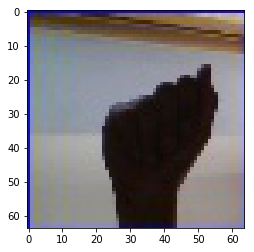

In [4]:
index = 1
plt.imshow(X_train_orig[index])
print ("y= " + str(np.squeeze(Y_train_orig[:,index])))

In [5]:
X_train = X_train_orig/255.
X_test  = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 2).T
Y_test  = convert_to_one_hot(Y_test_orig, 2).T 
print ("Y_test_orig ", Y_test_orig.reshape(-1))
print ("y yest", Y_test)
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

Y_test_orig  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1

In [6]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    X = tf.placeholder(tf.float32, shape = [None, n_H0, n_W0, n_C0])
    Y = tf.placeholder(tf.float32, shape = [None, n_y])
    
    return X, Y

In [7]:
X, Y = create_placeholders(1584, 1224, 3, 2)
print ("X= " + str(X))
print ("Y= " + str(Y))

X= Tensor("Placeholder:0", shape=(?, 1584, 1224, 3), dtype=float32)
Y= Tensor("Placeholder_1:0", shape=(?, 2), dtype=float32)


In [8]:
def initialize_parameters():
    tf.set_random_seed(1)
    
    W1 = tf.get_variable('W1', [4, 4, 3, 8], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable('W2', [2, 2, 8, 16],initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    
    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [9]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    xx=parameters["W1"].eval()[1,1,1]
    print("W1 = " + str(parameters["W1"].eval()[1,1,1]))
    print("W2 = " + str(parameters["W2"].eval()[1,1,1]))

W1 = [ 0.00131723  0.1417614  -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
W2 = [-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]


In [10]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    Z1 = tf.nn.conv2d(X, W1, strides = [1,1,1,1], padding = 'SAME')
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1, ksize = [1, 8, 8, 1], strides = [1, 8, 8, 1], padding = 'SAME')
    Z2 = tf.nn.conv2d(P1, W2, strides = [1, 1, 1, 1], padding = 'SAME')
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2, ksize = [1, 4, 4, 1], strides = [1,4,4,1], padding = 'SAME')
    
    P2 = tf.contrib.layers.flatten(P2)
    
    Z3 = tf.contrib.layers.fully_connected(P2, 2, activation_fn = None)
    
    return Z3

In [11]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(1000, 1000, 3, 2)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2,1000,1000,3), Y: np.random.randn(2,2)})
    print("Z3 = " + str(a))
    

Z3 = [[-1.641912    1.0637628 ]
 [-1.425164    0.82379615]]


In [12]:
def compute_cost(Z3, Y):
    cost = tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels =Y)
    cost = tf.reduce_mean(cost)
    
    return cost

In [13]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 2)
    parameters = initialize_parameters()
    Z3   = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost,{X: np.random.randn(4, 64, 64, 3), Y: np.random.randn(4,2)})
    print("cost= " + str(a))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

cost= 2.160851


In [14]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009, num_epochs = 16, minibatch_size = 8, print_cost = True):
    
    ops.reset_default_graph() # to rerun the model without overwritting tf variables
    tf.set_random_seed(1)
    seed = 3 #numpy seed
    print (X_train.shape)
    (m, n_H0, n_W0, n_C0) = X_train.shape
    n_y = Y_train.shape[1]
    costs = []
    
    X, Y =create_placeholders(n_H0, n_W0, n_C0, n_y)
    parameters = initialize_parameters()
    
    Z3 = forward_propagation(X, parameters)
    print (Z3)
    cost = compute_cost(Z3, Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with  tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(num_epochs):
            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) #number of minibatch size intrainSet
            
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            
            for minibatch in minibatches:
                
                (minibatch_X, minibatch_Y) = minibatch
                _, temp_cost = sess.run([optimizer, cost], feed_dict = {X: minibatch_X, Y: minibatch_Y})
                minibatch_cost += temp_cost/num_minibatches
                
                if print_cost == True and epoch % 5 == 0:
                    print ("Cost After epoch %i : %f" %(epoch, minibatch_cost))
                if print_cost == True and epoch % 1 == 0:
                    costs.append(minibatch_cost)    
                                     
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iteration per 10')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1)) 

        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)                                    

        return train_accuracy, test_accuracy, parameters                                    



(842, 64, 64, 3)
Tensor("fully_connected/BiasAdd:0", shape=(?, 2), dtype=float32)
Cost After epoch 0 : 0.008121
Cost After epoch 0 : 0.014588
Cost After epoch 0 : 0.021399
Cost After epoch 0 : 0.028661
Cost After epoch 0 : 0.035397
Cost After epoch 0 : 0.042034
Cost After epoch 0 : 0.048426
Cost After epoch 0 : 0.055208
Cost After epoch 0 : 0.061563
Cost After epoch 0 : 0.068169
Cost After epoch 0 : 0.073783
Cost After epoch 0 : 0.080955
Cost After epoch 0 : 0.089214
Cost After epoch 0 : 0.096071
Cost After epoch 0 : 0.102355
Cost After epoch 0 : 0.109380
Cost After epoch 0 : 0.115757
Cost After epoch 0 : 0.122944
Cost After epoch 0 : 0.131169
Cost After epoch 0 : 0.136645
Cost After epoch 0 : 0.142864
Cost After epoch 0 : 0.149881
Cost After epoch 0 : 0.156987
Cost After epoch 0 : 0.164195
Cost After epoch 0 : 0.170876
Cost After epoch 0 : 0.177361
Cost After epoch 0 : 0.183678
Cost After epoch 0 : 0.190408
Cost After epoch 0 : 0.196942
Cost After epoch 0 : 0.203623
Cost After epoch 0

Cost After epoch 10 : 0.157062
Cost After epoch 10 : 0.161952
Cost After epoch 10 : 0.164186
Cost After epoch 10 : 0.168433
Cost After epoch 10 : 0.173226
Cost After epoch 10 : 0.176379
Cost After epoch 10 : 0.177797
Cost After epoch 10 : 0.179483
Cost After epoch 10 : 0.181943
Cost After epoch 10 : 0.184322
Cost After epoch 10 : 0.185267
Cost After epoch 10 : 0.187218
Cost After epoch 10 : 0.194139
Cost After epoch 10 : 0.201158
Cost After epoch 10 : 0.203769
Cost After epoch 10 : 0.204462
Cost After epoch 10 : 0.207068
Cost After epoch 10 : 0.207721
Cost After epoch 10 : 0.210630
Cost After epoch 10 : 0.214819
Cost After epoch 10 : 0.215283
Cost After epoch 10 : 0.218904
Cost After epoch 10 : 0.221755
Cost After epoch 10 : 0.223263
Cost After epoch 10 : 0.225347
Cost After epoch 10 : 0.227176
Cost After epoch 10 : 0.230310
Cost After epoch 10 : 0.233047
Cost After epoch 10 : 0.233439
Cost After epoch 10 : 0.234606
Cost After epoch 10 : 0.237296
Cost After epoch 10 : 0.238872
Cost Aft

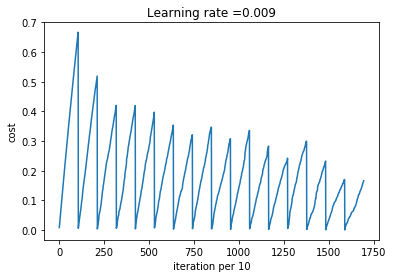

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.9049881
Test Accuracy: 0.86214954


In [15]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)

In [16]:
inferencing_input = load_images_for_inferencing('input')
print (inferencing_input.shape)

(1, 64, 64, 3)


In [17]:
ops.reset_default_graph()
Z33 = forward_propagation(X,parameters)

ValueError: Tensor("W1:0", shape=(4, 4, 3, 8), dtype=float32_ref) must be from the same graph as Tensor("Placeholder:0", shape=(?, 64, 64, 3), dtype=float32).

In [ ]:
_ = inference_prediction(inferencing_input, parameters)